#  <span style="color:blue"> <center> Perceptron algorithm </center></span>

Tune iteratively a line $y=wx+b$ that works as a decision boundary in a binary classification problem by slightly adjusting $w$ and $b$ as long as at least one point in the training set is not correctly classified. Data needs to be linearly separable.

*Examples 1 and 2 are taken from edx: 'DSE220x : Machine Learning Fundamentals'.*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron
import pandas as pd

In [2]:
def plot_classification_map(clf, data, color_at, marker_at, label_names):

    differ_labels = len(np.unique( data[:,2] ))
    x_range = np.linspace( np.min(data[:,0]), np.max(data[:, 0]), 1000 )

    plt.figure()
    x1_range = np.arange( np.min(data[:,0])-1, np.max(data[:, 0])+1 , 0.05 )
    x2_range = np.arange( np.min(data[:,1])-1, np.max(data[:, 1])+1 , 0.05 )
    X1_space, X2_space  = np.meshgrid( x1_range, x2_range )

    grid = np.c_[X1_space.ravel(), X2_space.ravel()]


    Z = np.array([clf.predict( np.array([[point[0]],[point[1]]]).reshape(-1,1).T ) for point in grid])
    Z = Z.reshape(X1_space.shape)
    plt.pcolormesh(X1_space, X2_space, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=1+np.max(data[:,2]))

    for each_class in range(differ_labels):
        class_1_points = data[ data[:,2]== each_class , :] 
        plt.scatter( class_1_points[:, 0], class_1_points[:, 1], c=color_at[each_class], marker=marker_at[each_class], label='{}'.format(label_names[each_class]))

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='best')
    plt.show()

## <span style="color:yellow"> ----------------------------------------------------------------------------------</span>
## <span style="color:red">Ex.1 - Simple perceptron for binary classification</span>


In [3]:
data = np.loadtxt('data_1.txt')

In [4]:
train_set = data[:,0:2]
train_labels = data[:,2]

clf = Perceptron(tol=1e-5, max_iter = 1000)
clf.fit(train_set, train_labels)
clf.score(train_set, train_labels)

w = clf.coef_
b = clf.intercept_

print('Coefficients: ', w)
print('Intercept: ', b)
print('Accuracy: ', clf.score(train_set, train_labels))

Coefficients:  [[-8. -4.]]
Intercept:  [45.]
Accuracy:  1.0


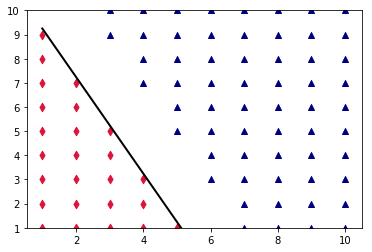

In [5]:
x_range = np.linspace( np.min(data[:,0]), np.max(data[:, 0]) )

a1 = -w[0][0]/w[0][1]
a2 = -b/w[0][1]

y_percepted = a1*x_range + a2

class_1_points = data[ data[:,2]==1 , :] 
class_2_points = data[ data[:,2]==-1 , :] 
plt.figure()
plt.scatter( class_1_points[:, 0], class_1_points[:, 1], c='crimson', marker='d')
plt.scatter( class_2_points[:, 0], class_2_points[:, 1], c='navy', marker='^')
plt.plot( x_range, y_percepted, 'k', linewidth=2 )
plt.ylim([np.min(data[:,1]), np.max(data[:, 1])])
plt.show()

## <span style="color:yellow"> ----------------------------------------------------------------------------------</span>
## <span style="color:red">Ex.2 - Multiclass Perceptron </span>

For each possible $k$ lable, build a line $w_k x + b_k$. 

In [6]:
data = np.loadtxt('data_4.txt')
train_set = data[:,0:2]
train_labels = data[:,2]

clf = Perceptron(tol=1e-6, max_iter = 10000)
clf.fit(train_set, train_labels)
clf.score(train_set, train_labels)

w = clf.coef_
b = clf.intercept_

print('Coefficients: ', w)
print('Intercept: ', b)
print('Accuracy: ', clf.score(train_set, train_labels))

Coefficients:  [[  1. -20.]
 [-35.  21.]
 [  4.   2.]]
Intercept:  [ 41.   7. -35.]
Accuracy:  0.9333333333333333


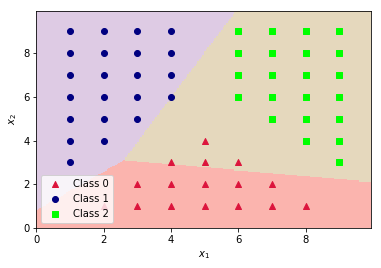

In [7]:
color_at = ['crimson', 'navy', 'lime', 'black']
marker_at = ['^', 'o', 's', 'd']
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
plot_classification_map(clf, data, color_at, marker_at, label_names)